<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/Unsupervised_ML_Project/blob/main/Unsupervised_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movie and TV show Clustering




##### **Project Type**    - Unsupervised ML Project
##### **Contribution**    - Individual
##### **Member  -** Rooban J


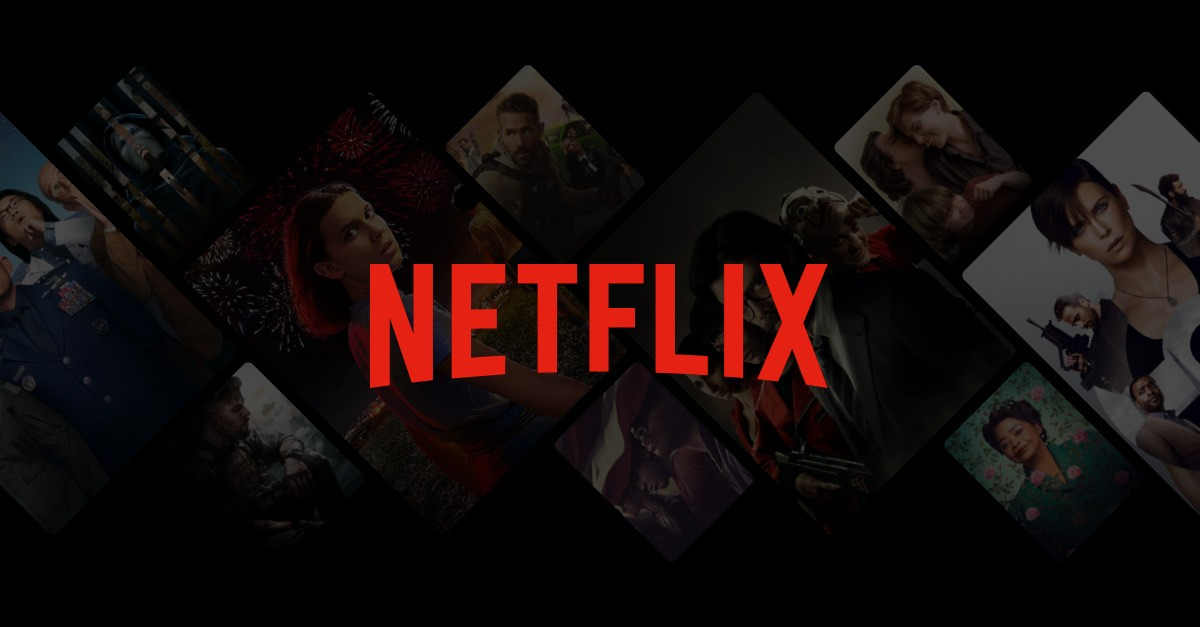

# **Project Summary**

The study was conducted to analyze the dataset obtained by a search engine named Flixable. The dataset have details of Netflix movies and TV shows until year of 2019. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn from Netflix, which currently has subscribers over and around 250 million subscribers. The dataset will be analyzed to unveil insights and trends in the streaming entertainment industry.

The study is conducted by following some step-by-step processes to get valuable insights out of it. Those are,

* Handling null values by using data wrangling techniques in the dataset.
* Managing columns with nested sequence **(director, cast, listed_in, country)** for better result while visualization.
* Categorizing the values in a feature by binning them based on rating of that attribute **(adult, children's, family-friendly, not rated).**
* Performing **Exploratory Data Analysis (EDA)** to gain valuable insights for preventing subscriber churn.
* Grouping the values by forming clusters in attributes like **director, cast, country, genre, rating, and description** to make data more usable.
* In next step attributes were **tokenized, preprocessed, and vectorized** for making data more usable. **TF-IDF vectorizer** is the library used for this process.
* **PCA** technique is used in reducing the dimensionality of the dataset to improve performance.
* Implementing **K-Means Clustering and Agglomerative Hierarchical Clustering** algorithms. These algorithms are used to determine optimal number of clusters (4 for K-Means, 2 for hierarchical clustering) through various evaluation metrics.
* Developing a **content-based recommender system** using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix.




# **GitHub Link -**

https://github.com/Rooban-Jeyasundar/Unsupervised_ML_Project.git

# **Problem Statement**


* **This dataset consists of tv shows and movies available on Netflix as of 2019.From the dataset, we get some insights like streaming of number of TV shows on Netflix has nearly tripled since 2010 but streaming service’s number of movies has decreased by more than 2,000 titles.**

* **This study is conducted to know about the features impacting in content selection and subscriber churn then by using this comprehensive analysis and recommendation systems we are expected to enhance user satisfaction, reasulting in the improvement on retention rates for Netflix.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#more libraries to data transformation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv


### Dataset First View

In [ ]:
# Dataset First Look
import io
netflix_df = pd.read_csv((io.BytesIO(uploaded['NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv'])),encoding='unicode_escape')
print(netflix_df.sample(10))

     show_id     type                           title  \
1606   s1607    Movie  Dany Boon: Des Hauts De France   
381     s382    Movie             Alexandria ... Why?   
5379   s5380    Movie             Santa Banta Pvt Ltd   
3524   s3525    Movie                         Lakshya   
3072   s3073    Movie                           Issaq   
4346   s4347  TV Show              My Perfect Landing   
2384   s2385    Movie              Get Me Roger Stone   
2179   s2180    Movie                       Fireworks   
2386   s2387    Movie                       Get Santa   
4184   s4185    Movie                  Monster Family   

                                      director  \
1606                            Isabelle Nanty   
381                            Youssef Chahine   
5379                                 Akashdeep   
3524                             Farhan Akhtar   
3072                             Manish Tiwary   
4346                                       NaN   
2384  Dylan Bank, Dani

In [ ]:
netflix_df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
print('Shape of Dataset',netflix_df.shape)
print('Count of Rows',netflix_df.shape[0])
print('Count of Columns',netflix_df.shape[1])

Shape of Dataset (7787, 12)
Count of Rows 7787
Count of Columns 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Count of Duplicate values in the dataset : ',len(netflix_df[netflix_df.duplicated()]),"Values")

Count of Duplicate values in the dataset :  0 Values


* From the above result, we clearly see that there are no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Null values in each columns')
netflix_df.isnull().sum()

Null values in each columns


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

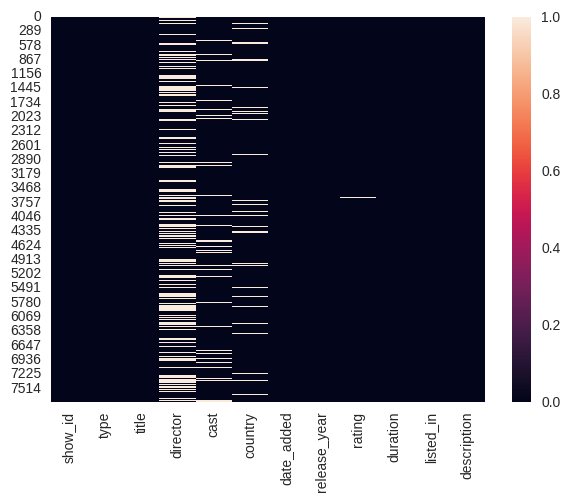

In [ ]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(netflix_df.isnull())
plt.show()

### What did you know about your dataset?

* From the study, we see that dataset of "Netflix Movies and TV Shows Clustering" comprises of 12 columns, with only one column having an integer data type values.

* From the analysis, we found that there is no duplicate values in any of the features.

* Regarding null values, out of 12 columns in the dataset five columns have null values: director, cast, country, date_added, and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Columns in the dataset : ")
netflix_df.columns

Columns in the dataset : 


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include='all')

show_id   type title                 director                cast  \
count     7787   7787  7787                     5398                7069   
unique    7787      2  7787                     4049                6831   
top         s1  Movie    3%  RaÃºl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                       18                  18   
mean       NaN    NaN   NaN                      NaN                 NaN   
std        NaN    NaN   NaN                      NaN                 NaN   
min        NaN    NaN   NaN                      NaN                 NaN   
25%        NaN    NaN   NaN                      NaN                 NaN   
50%        NaN    NaN   NaN                      NaN                 NaN   
75%        NaN    NaN   NaN                      NaN                 NaN   
max        NaN    NaN   NaN                      NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

Each column in the dataset is a variable which impacting the Netflix Movies and TV Shows Clustering Dataset.

Description of those variables are as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique values in each variable')
print("          ")

for i in netflix_df.columns:
  print('Count of unique values in :',i ,"-",netflix_df[i].nunique())# '{netflix_df[i].nunique()}')

Number of unique values in each variable
          
Count of unique values in : show_id - 7787
Count of unique values in : type - 2
Count of unique values in : title - 7787
Count of unique values in : director - 4049
Count of unique values in : cast - 6831
Count of unique values in : country - 681
Count of unique values in : date_added - 1565
Count of unique values in : release_year - 73
Count of unique values in : rating - 14
Count of unique values in : duration - 216
Count of unique values in : listed_in - 492
Count of unique values in : description - 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Here we're handling the null values from all features

print('Null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum())
#As we know five colums have null values, we are checking the percentage of those values
print("----------------------------------------------")
print('Percentage of null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum()/len(netflix_df)*100)

Null values in each columns
----------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
----------------------------------------------
Percentage of null values in each columns
----------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


* From the result, we see that 'date_added' and 'rating' variables have very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
* On other send, We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high because we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
* We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
# As per our discussion

# Imputing null values of director and cast feature with unknown
netflix_df[['director','cast']]=netflix_df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
netflix_df['country']=netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
#Checking the outcome of above process
print('Null values in each columns')
print("----------------------------------------------")
print(netflix_df.isnull().sum())

Null values in each columns
----------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


▶   **Some of the features have nested(combined) values like 'director', 'cast', 'listed_in' and 'country'. So we are handling those nested columns.**

In [ ]:
# Let's create a copy of dataframe and unnest the original one
new_netflix_df = netflix_df.copy()

# Unnesting 'Directors' column
dir_constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = netflix_df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

title         Directors
4439                          Mischief       Emcy Joseph
6671                          The Body     Jeethu Joseph
3260          Inside the Criminal Mind           Unknown
3406  Jerry Seinfeld: 23 Hours To Kill        Joe DeMaio
3454                       John Carter    Andrew Stanton
8285      Whitney Cummings: Money Shot  John Fortenberry
1796                        Death Note      Adam Wingard
2665                         Goldstone          Ivan Sen
6499                              Tatu         Don Omope
3681                    Kiss the Girls       Gary Fleder

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(listed_constraint, index = netflix_df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Genre'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

title                   Genre
13912            The Flying Guillotine    International Movies
15314                  The Willoughbys                Comedies
16860                    Yes or No 2.5            LGBTQ Movies
13708                     The Darkness               Thrillers
3851               Dil Vil Pyaar Vyaar    International Movies
15389                          Theeram                  Dramas
16920                      Young Adult                Comedies
10042    Oh No! It's an Alien Invasion     TV Sci-Fi & Fantasy
9330                        Much Loved    International Movies
13774  The Disastrous Life of Saiki K.  International TV Shows

In [ ]:
# Unnesting 'cast' column
cast_constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(cast_constraint, index = netflix_df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Actors'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

title                 Actors
27387            Luis Miguel - The Series         CÃ©sar BordÃ³n
53089                 Unauthorized Living         Leonor Watling
9954       Chilling Adventures of Sabrina             Lucy Davis
497    13 Reasons Why: Beyond the Reasons       Marissa Jo Cerar
33296                           Only Mine  Nancy Linehan Charles
22725          Jandino: Whatever it Takes       Jandino Asporaat
11903                      Darna Mana Hai          Shilpa Shetty
19549                     Heartbreak High     Katherine Halliday
40345                      Sister, Sister               Tim Reid
49894                  The Social Network              John Getz

In [ ]:
# Unnesting 'country' column
country_constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = netflix_df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

title         Country
2779  From Dusk Till Dawn   United States
6433               Sahara          Canada
7705       The First Lady   United States
2773       Friend Request         Germany
6295          Rising High         Germany
272      A Sort of Family          Brazil
1683          Cinar Agaci          Turkey
8705        Tip the Mouse           Italy
5737        Paradise Lost          Brazil
6891         Son of a Gun  United Kingdom

**Great, we have sucessfully separated values in the nested columns.**

**Next we have to merge all the created dataframe into the single dataframe.**

In [ ]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
merged_df = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
merged_df.head()

title                   Genre Directors            Actors Country
0    3%  International TV Shows   Unknown      JoÃ£o Miguel  Brazil
1    3%  International TV Shows   Unknown  Bianca Comparato  Brazil
2    3%  International TV Shows   Unknown      Michel Gomes  Brazil
3    3%  International TV Shows   Unknown   Rodolfo Valente  Brazil
4    3%  International TV Shows   Unknown   Vaneza Oliveira  Brazil

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe using left join

netflix_df = merged_df.merge(netflix_df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
netflix_df.head(5)

title                   Genre Directors            Actors Country     type  \
0    3%  International TV Shows   Unknown      JoÃ£o Miguel  Brazil  TV Show   
1    3%  International TV Shows   Unknown  Bianca Comparato  Brazil  TV Show   
2    3%  International TV Shows   Unknown      Michel Gomes  Brazil  TV Show   
3    3%  International TV Shows   Unknown   Rodolfo Valente  Brazil  TV Show   
4    3%  International TV Shows   Unknown   Vaneza Oliveira  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

* In the above step, we merge this dataframe with the original one on the left join to avoid information loss.

* Next step is to looking to correct the datatype of each columns

####**Typecasting the attributes**

In [ ]:
print('Columns in the dataset before typecasting')
netflix_df.columns.tolist()

Columns in the dataset before typecasting


['title',
 'Genre',
 'Directors',
 'Actors',
 'Country',
 'type',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'description']

In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
netflix_df['duration']= netflix_df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
netflix_df['date_added']= pd.to_datetime(netflix_df['date_added'])

# Extracting date, day, month and year from date_added column
netflix_df["day_added"]= netflix_df["date_added"].dt.day
netflix_df["month_added"]= netflix_df["date_added"].dt.month
netflix_df["year_added"]= netflix_df["date_added"].dt.year

# Dropping date_added
netflix_df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Checking info of the dataset after typecasting
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Genre         175807 non-null  object
 2   Directors     175807 non-null  object
 3   Actors        175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


###**Bining the features**

In the rating column, we have different categories of content classified based on content rating these categories are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's look at some the categories and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

These are the explanations for some categories in the rating column. To reduce the complications, we are binning these several categories into some basic categories like.,

* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [ ]:
#Reviewing the dataset after the process
netflix_df.head()

title                   Genre Directors            Actors Country     type  \
0    3%  International TV Shows   Unknown      JoÃ£o Miguel  Brazil  TV Show   
1    3%  International TV Shows   Unknown  Bianca Comparato  Brazil  TV Show   
2    3%  International TV Shows   Unknown      Michel Gomes  Brazil  TV Show   
3    3%  International TV Shows   Unknown   Rodolfo Valente  Brazil  TV Show   
4    3%  International TV Shows   Unknown   Vaneza Oliveira  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   
1  In a future where the elite inhabit an island ...         14            8   
2  In a future where the elite inhabit an island ...         14            8   
3  In a future where the elite inhabit an island ...         14            8   
4  In a future where the elite inhabit an island ...         14            8   

   year_added  
0        2020  
1        2020  
2        2020  
3        2020  
4        2020

In [ ]:
# Spearating the dataframes for further analysis
df_movies= netflix_df[netflix_df['type']== 'Movie']
df_tvshows= netflix_df[netflix_df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

In the study, We have divided data wrangling into five different sections:

*  First step involves in imputation or dropping the null values like 'director' and 'cast' with 'Unknown' and 'country' with Mode, then we drop null values of 'date_added' and 'rating' because of less impact.

* In the section of unnesting, we unnested the values and stored in different dataframes and then  merged all the dataframe with the original one using left join in order to get the isolated values of each of the feature.

* In next step values are typecasted to suitable data types and then feature transformation done on following features:
    * 'date' from 'date_added'.
    * 'month' from 'date_added'.
    * 'year' from 'date_added'.

* In the dataset, we see that the 'rating' column contains various coded categories, so we have created 5 bins and distribute the values accordingly:

    1. **Adult**: TV-MA, NC-17
    2. **Restricted**: R, UR
    3. **Teen**: PG-13, TV-14
    4. **All Ages**: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
    5. **Not Rated**: NR

* In final step, we have splitted the dataframe into two dataframes one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows which will be useful in our further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
df_movies.columns

Index(['title', 'Genre', 'Directors', 'Actors', 'Country', 'type',
       'release_year', 'rating', 'duration', 'description', 'day_added',
       'month_added', 'year_added'],
      dtype='object')

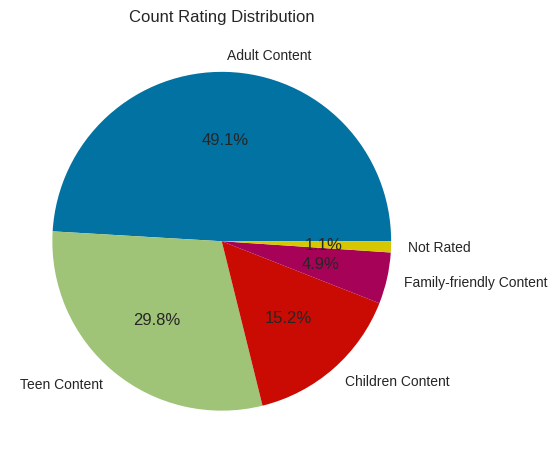

In [ ]:
# Chart - 1 visualization code
price_count = netflix_df['rating'].value_counts()
plt.pie(price_count,labels=price_count.index,autopct='%1.1f%%')
plt.title('Count Rating Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a type of graph that represents the data in a circular graph. A pie chart divides the circular statistical graphic into sectors or slices in order to illustrate the numerical problems.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we get insights about content distribution over different categories of content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes !
Most of the viewers tune into Adult and Teen contents, this will give some insights to netflix about the most viewed genre.

#### Chart - 2

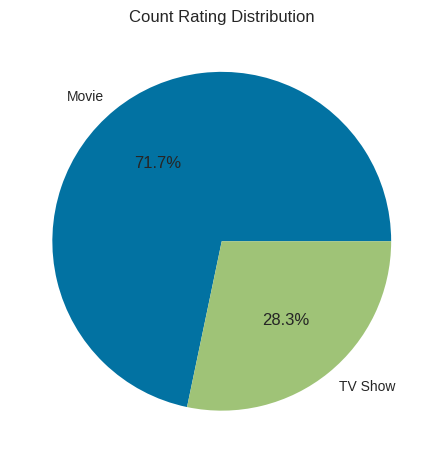

In [ ]:
# Chart - 2 visualization code

price_count = netflix_df['type'].value_counts()
plt.pie(price_count,labels=price_count.index,autopct='%1.1f%%')
plt.title('Count Rating Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the percent of TV shows and movie data present on Netflix Data set

##### 2. What is/are the insight(s) found from the chart?

* We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

* we can conclude that in the given Data set only **28.3% are TV Shows and 71.7% are Movies.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes!

Results will give the production house about some insights regarding that they should give more focus on quality movies because there is high competition in the market. TV Shows are less in numbers hence good opportunity for business.

#### Chart - 3

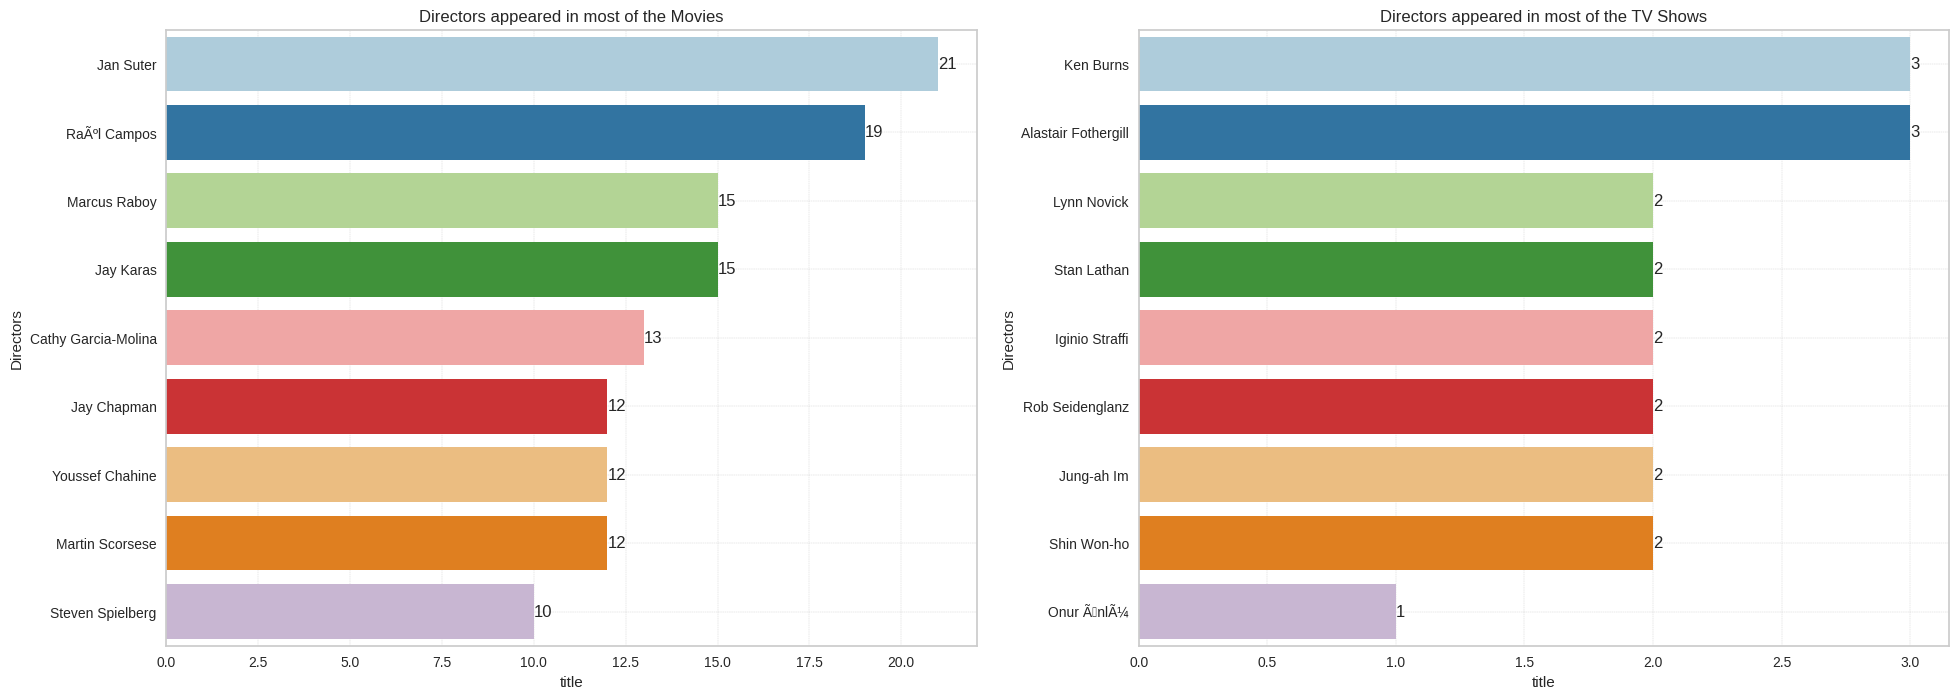

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts enable us to compare numerical values like integers and percentages. They use the length of each bar to represent the value of each variable.

##### 2. What is/are the insight(s) found from the chart?

We found the insight as most of the movies directed by **jan suter** and most TV shows directed by **ken burns**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes!

From the insights, Producers can select the popular director for their upcoming projects to make positive impacts.

#### Chart - 4

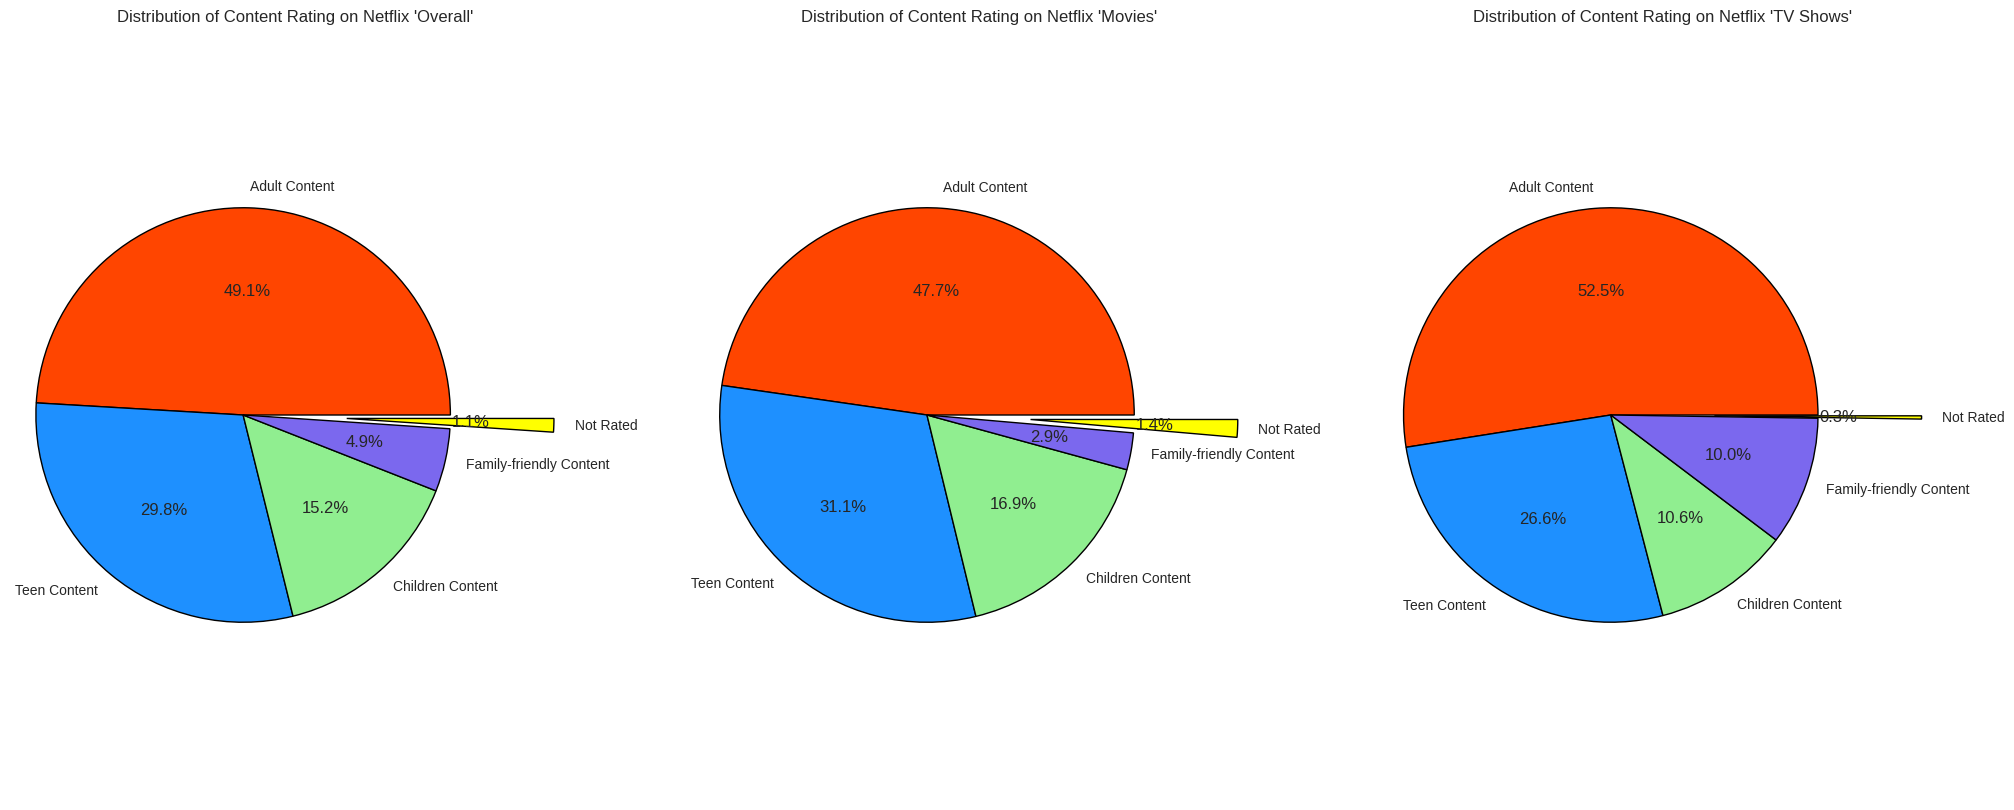

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(25,10))
for i,j,k in ((netflix_df, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

We chosen this chart to represent the percentage of type of content present in the Netflix over different generes.

##### 2. What is/are the insight(s) found from the chart?

* From the chart, We found that most of the content present in the Netflix belongs to Adult and the teen categories.

* Another important insight we can see that **Family friendly content** less in Movies compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes !

For higher positive impact production house should more focus on Teen and Adult content. But in some extent it will lead to the reduction of growth in Family-friendly category in TV Shows will impact in negative manner.

#### Chart - 5

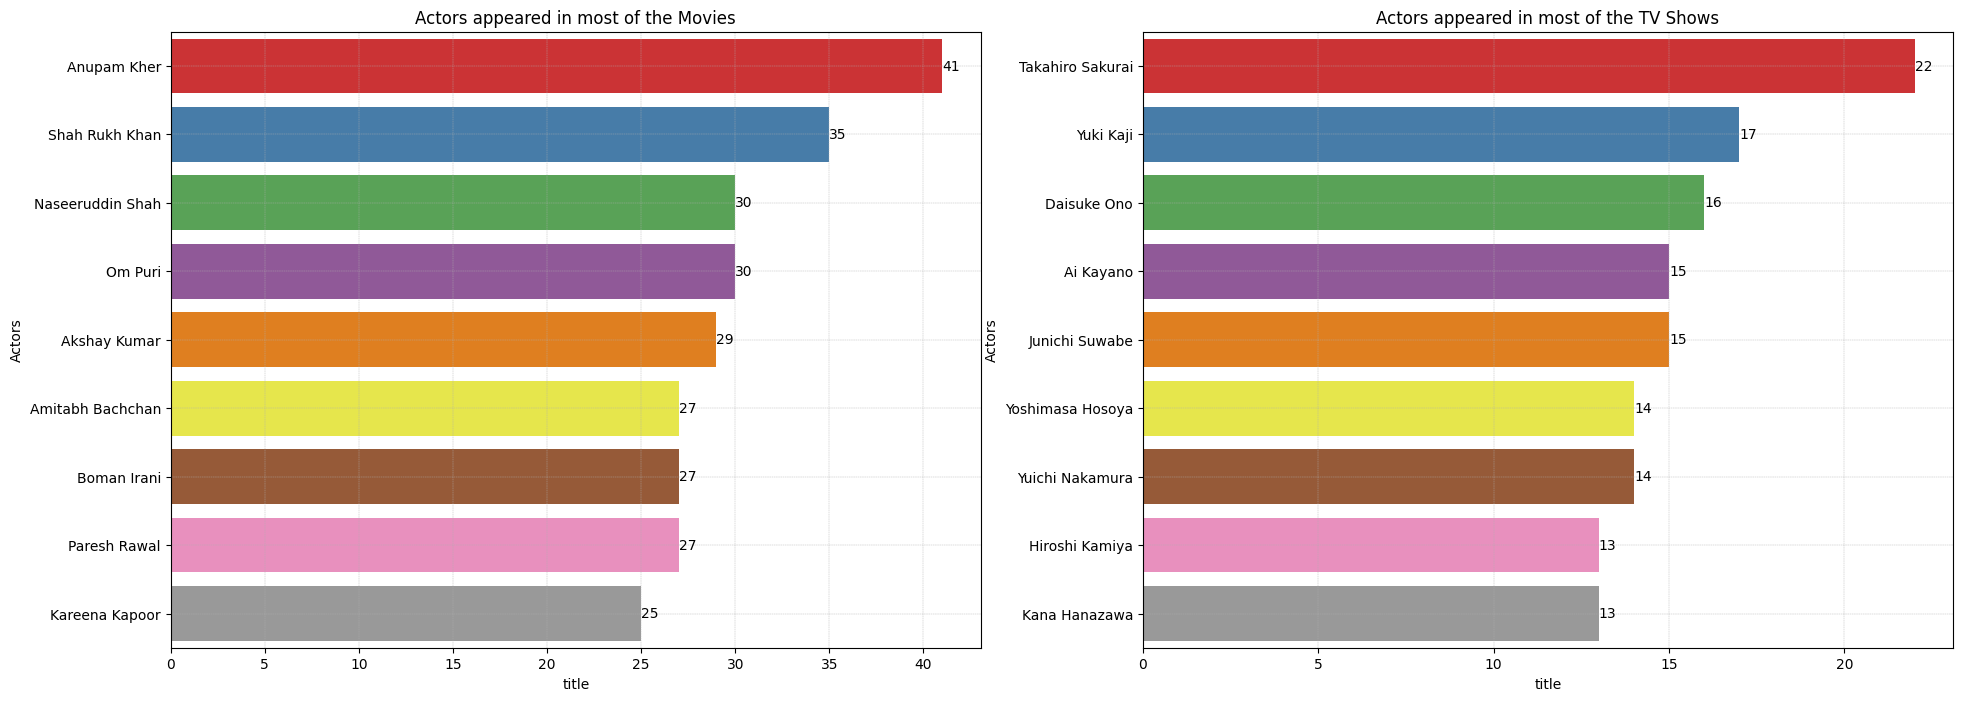

In [ ]:
# Chart - 5 visualization code
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to show variations in categories or subcategories scaling width or height across simple, spaced bars, or rectangles. In this chart, we tried to know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?

 We found an interesting insight that most of the Actors in Movies are from INDIA and No popular actors from india is in TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

About insights we found that Indians are movie lover, they love to watch movies hence business should target indian audience for Movies to create positive impact.

#### Chart - 6

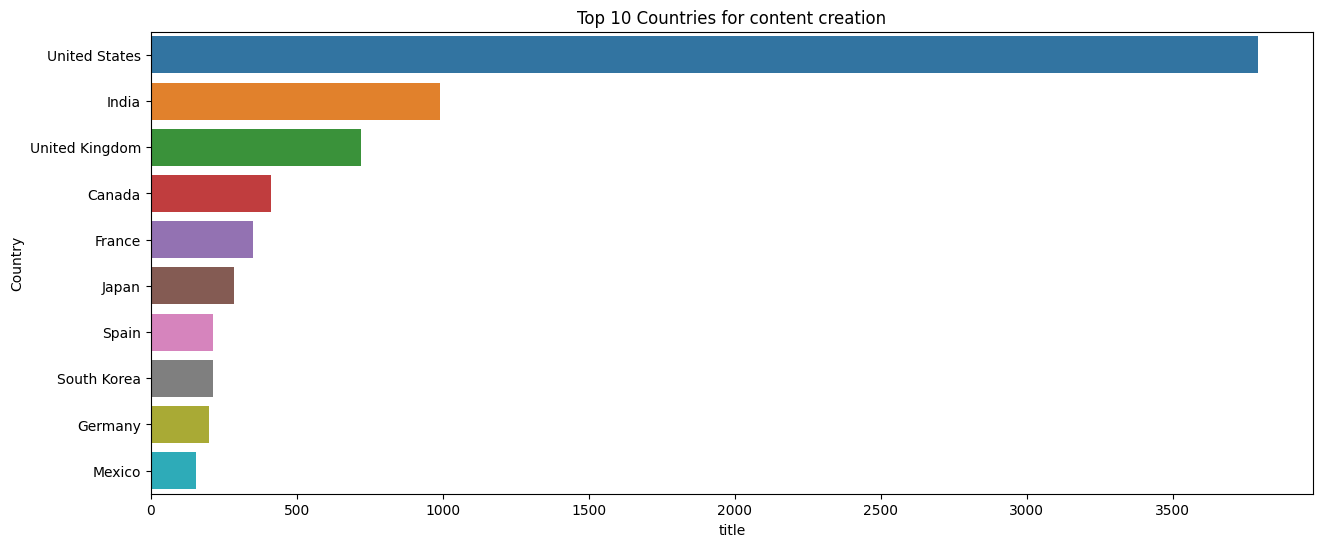

In [ ]:
# Chart - 6 visualization code

df_country = netflix_df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.title('Top 10 Countries for content creation')
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

From the chart,
* **United States is the top country producing both movies and TV shows on Netflix**. This suggests that Netflix is heavily influenced by American content.

* **India is the second-highest producer of movies on Netflix**, indicating the growing popularity of Bollywood movies worldwide.

* Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as investing in American and Bollywood content, and acquiring more diverse content.


#### Chart - 7

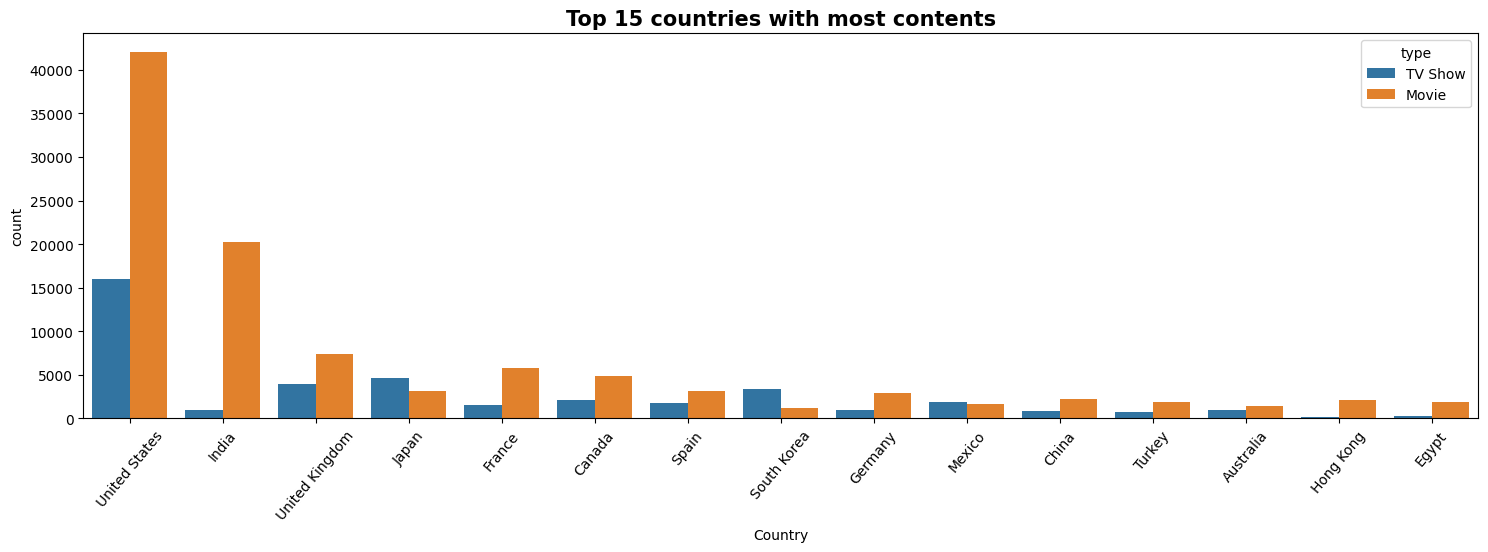

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(18,5))
sns.countplot(x=netflix_df['Country'],order=netflix_df['Country'].value_counts().index[0:15],hue=netflix_df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts are used to show each data category in a frequency distribution and display relative numbers or proportions of multiple categories.
* To know which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

From the chart we clearly see that **US** and **INDIA** are the countries with more content watch and creation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes !** the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as acquiring and producing more movies from US & India and more TV shows from Japan and South Korea.

#### Chart - 8

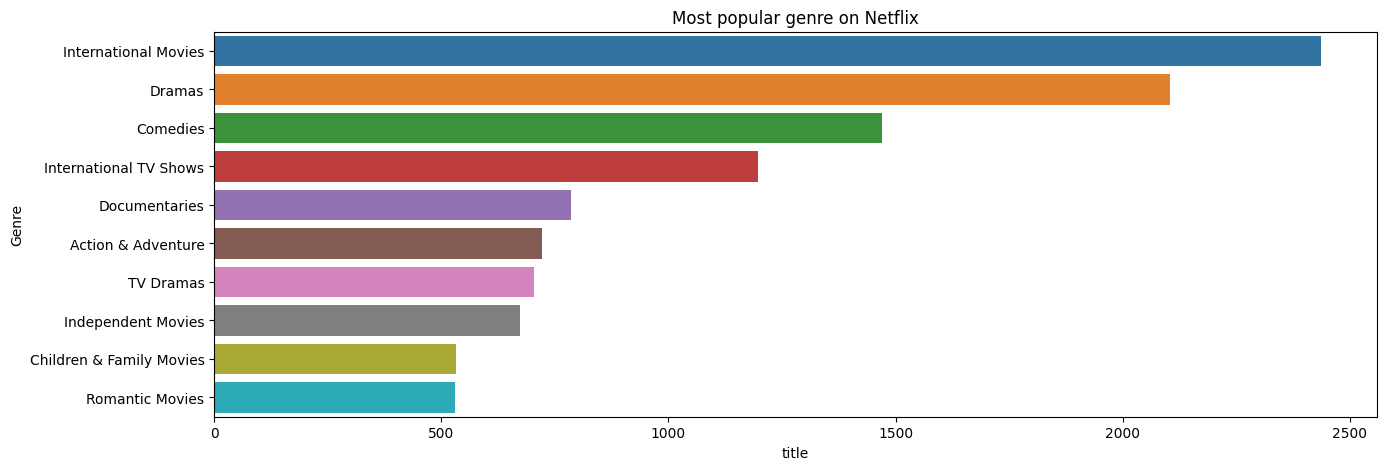

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,5))
df_genre = netflix_df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.show()


##### 1. Why did you pick the specific chart?

Above graph tells us which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

**International movies genre is most popular** in general and followed by **Drama** and **comedy**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience.

* This information can help Netflix to tailor its content acquisition and production strategies to better cater to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

#### Chart - 9

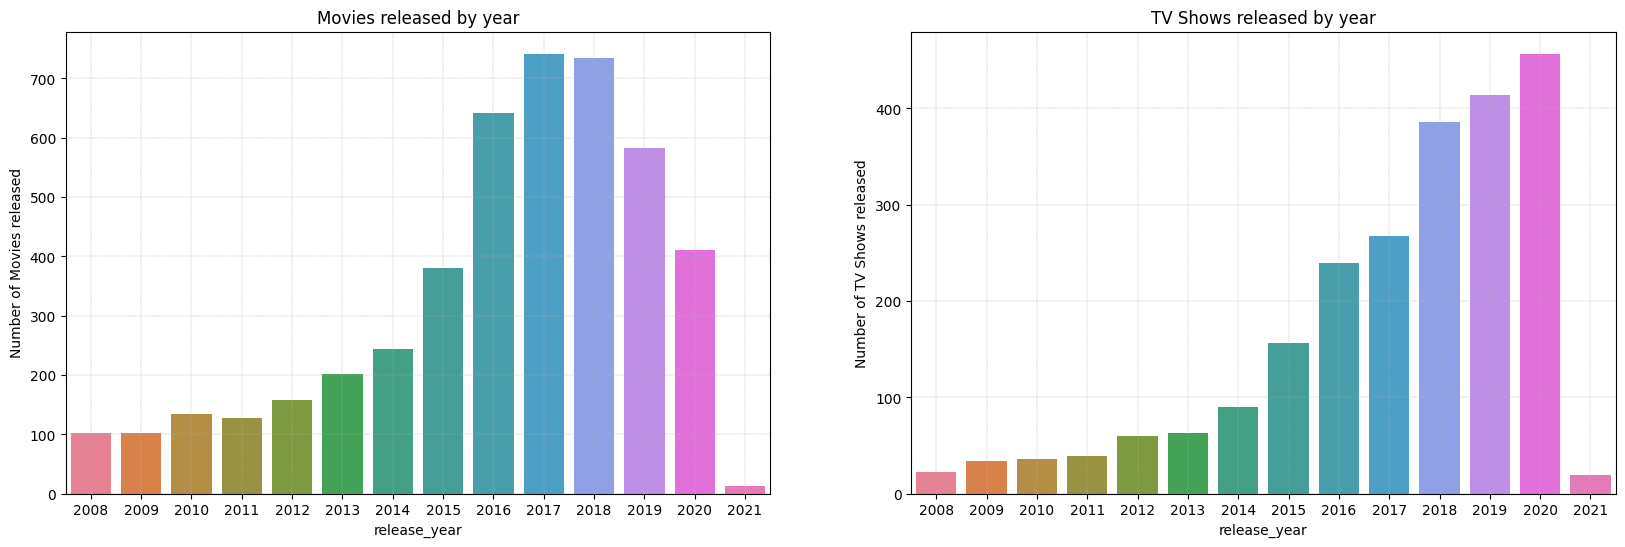

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

##### 1. Why did you pick the specific chart?

The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. This particular graph shows us how many movies and TV Show released in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can see that the number of movies and TV shows added on Netflix has been increasing steadily every year. But since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To mitigate the potential negative impact, Netflix could explore strategies to diversify its content offerings and adapt to changing consumer preferences. This could include investing in a mix of movies, TV shows, and other forms of original content such as documentaries, limited series, and stand-up comedy specials. By diversifying its content offerings, Netflix can attract a wider audience and maintain its relevance in the ever-evolving streaming landscape.

#### Chart - 10

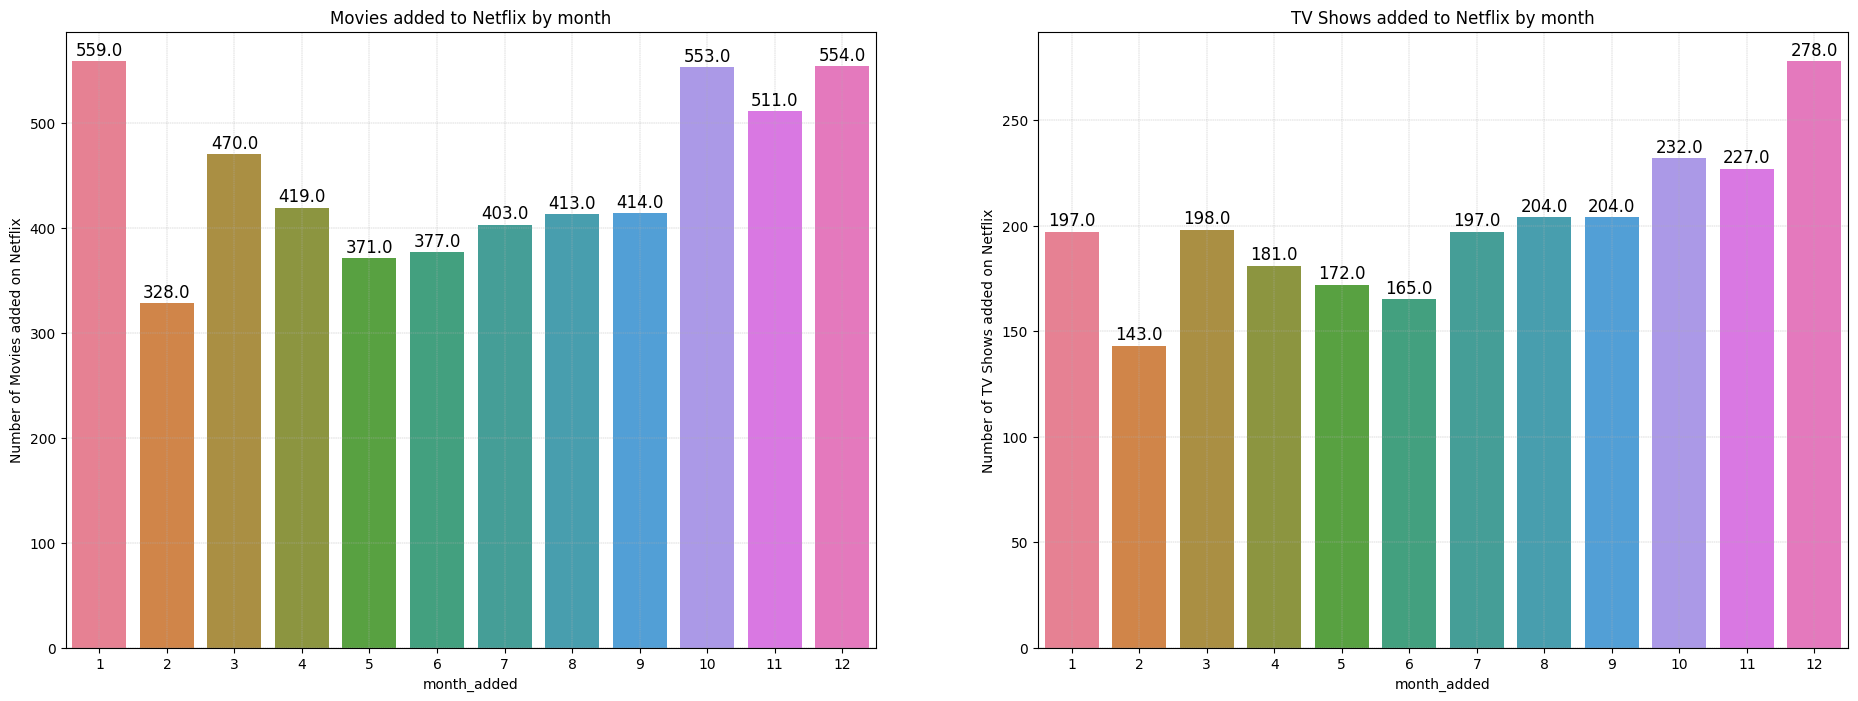

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us how many movies and TV Show added in every month on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* We found that October, November and December are the most popular months for TV shows addition and in movies category January, October and December are the most popular months for addition.

* February is the least popular month for the movies and TV shows to be added on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions.

This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

#### Chart - 11

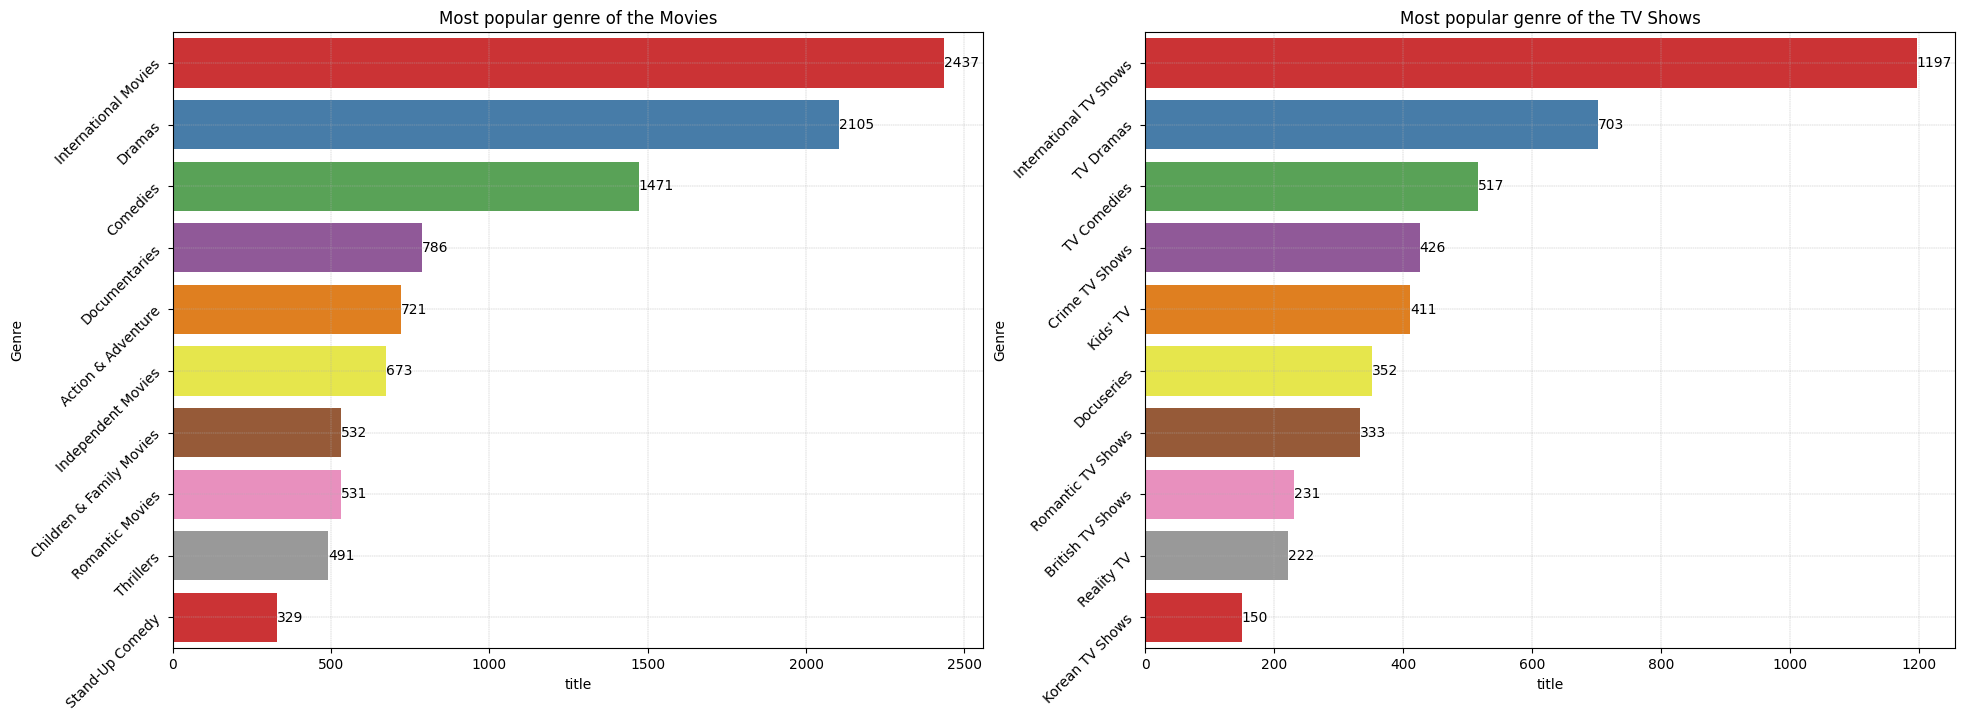

In [ ]:
# Chart - 11 visualization code

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Above graph tells us which are the most popular genre in Movies and TV Shows categories streamed in Netflix.

##### 2. What is/are the insight(s) found from the chart?

International movies genre is most popular in both the TV Shows and Movies category. Followed by Drama and comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience.

#### Chart - 12

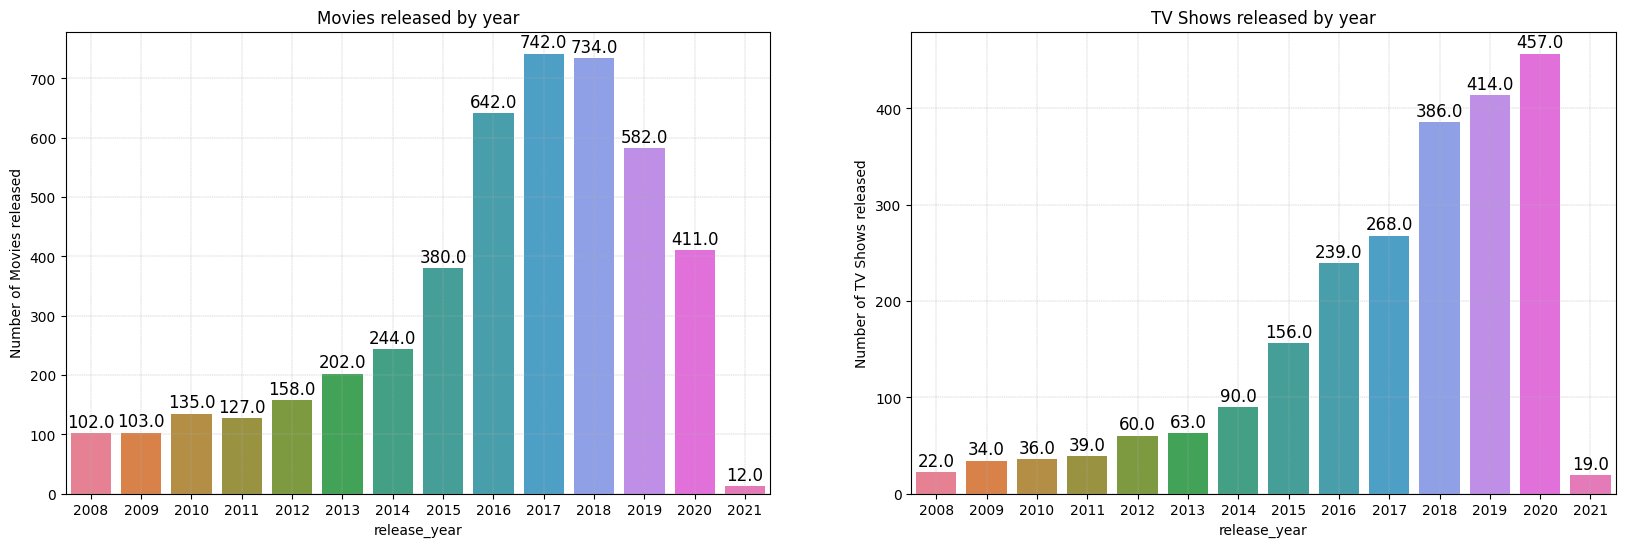

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us how many  movies and TV Show released in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the chart we found that since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since 2018, the number of movies released has decreased in movies genre but it increased in TV shows. This difference between two categories will impact positively to concentrate more on popular content.

#### Chart - 13

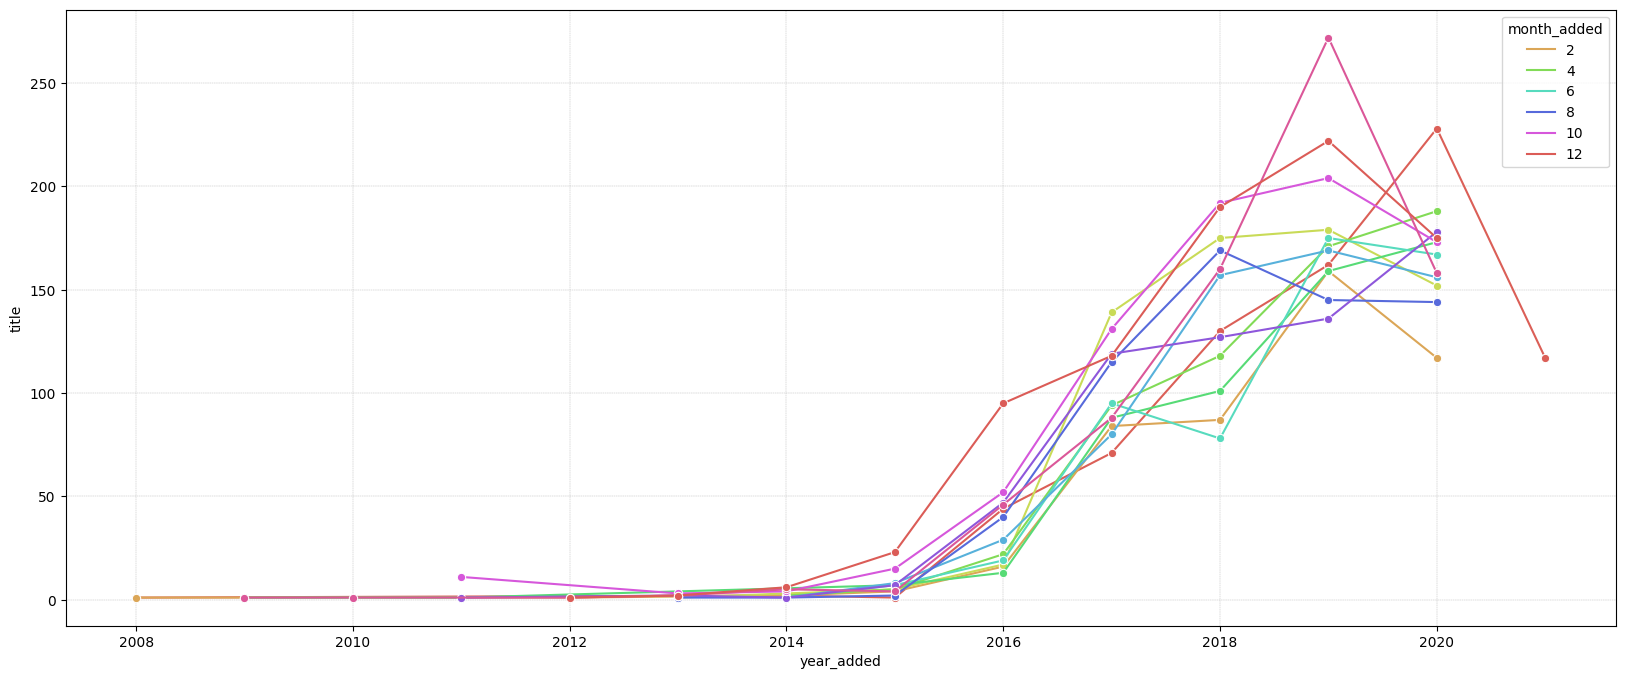

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(20,8))
df_year_month = netflix_df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x ='year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This bivariate graph helps us in knowing which month is dominating in adding movie/tvshows in a year.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we gained insighs like
*   We can see that there is no specific trend is followed, Instead of this some consecutive years shows month wise trend.

* From **2008 to 2009 we see movies added in the month of February, and from 2009  to 2011 movies added in the month of February and October**.

* After 2015 majority content added in the month of october to december

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes !

Content Producers should add movies in the month when audience is more responsive and also we didn't see any specific trend but most movies should be uploaded in year end with some discount in the subscription.

#### Chart - 14 - Correlation Heatmap

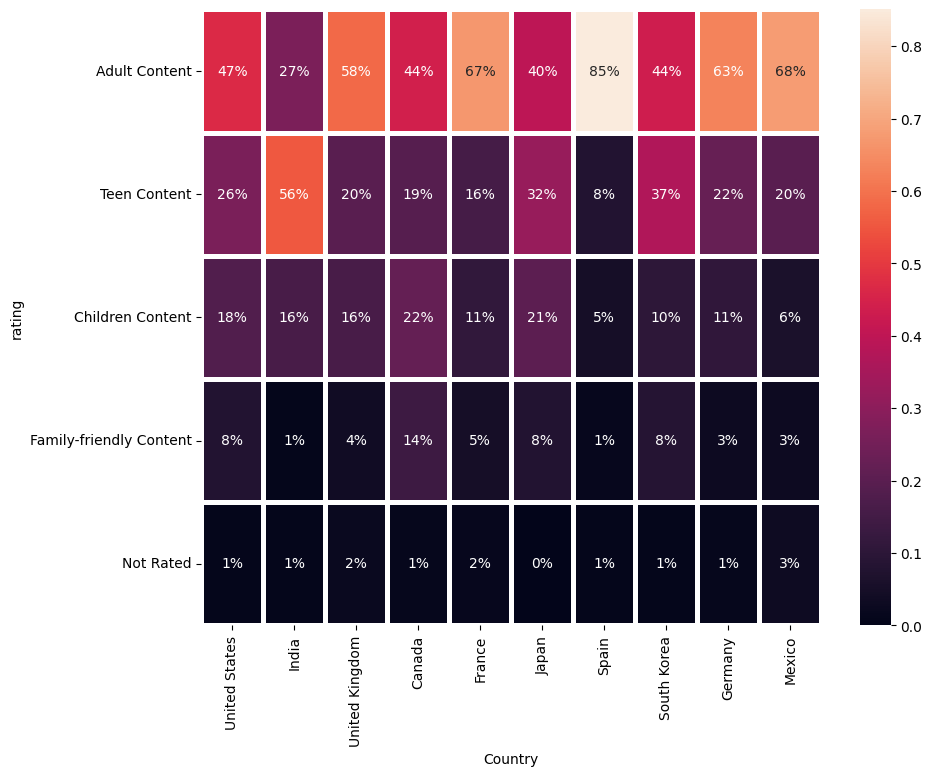

In [ ]:
# Correlation Heatmap visualization code
netflix_df['count'] = 1
data = netflix_df.groupby('Country')[['Country', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data = data['Country']
df_heatmap = netflix_df.loc[netflix_df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], linewidth=2.5,annot=True,  fmt='1.0%', ax=ax)
plt.show()


##### 1. Why did you pick the specific chart?

The primary purpose of the Heatmap in Seaborn is to display a color-coded correlation matrix for easy visualization of the relationship between the features in the data. This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

Heat Map clearly shows,
* We found that **most of the countries produces content related to Adult and Teen** but among all the countries **INDIA has less content in Adult segment than teen content.**

* Mostly around **85% of content is Adult content from spain** but related to Children and Family-Friendly content **Canada produces more content**.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In this testing process, we have tried two hypothesis statements to know about significant difference between samples.

*Hypothetical Statement 1:*
* **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

* **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 2:*
* **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

* **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2020)]
tv_2021 = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

t-value:  -6.002151232542292
p-value:  7.23381843379902e-09


##### Which statistical test have you done to obtain P-Value?

We have tried two-sample t-test to obtain the P-Value as a statistical test.

In the result, we get output as if P-Value is less than 0.05 then null hypothesis will be rejected and vice-versa.

##### Why did you choose the specific statistical test?

 In this study we have selected two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different for that we have chosen the two-sample t-test. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = netflix_df[netflix_df['Genre'].str.contains('Dramas') | netflix_df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama * len(subset)), int(comedy * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stats, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stats)
print('p-value: ', p_value)


# Print the results of the z-test
if p_value < 0.05:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

In this above study, we have used Z-test for the proportions to obtain the P-Value.

##### Why did you choose the specific statistical test?

We are dealing with two categorical variables (drama movies and comedy movies) in this sample test and for comparing the proportions, Z-test for proportions was chosen . The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not.

The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df.isna().sum()

title           0
Genre           0
Directors       0
Actors          0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

Let's move ahead, as we have already dealed with null/missing values from our dataset.

### 2. Handling Outliers

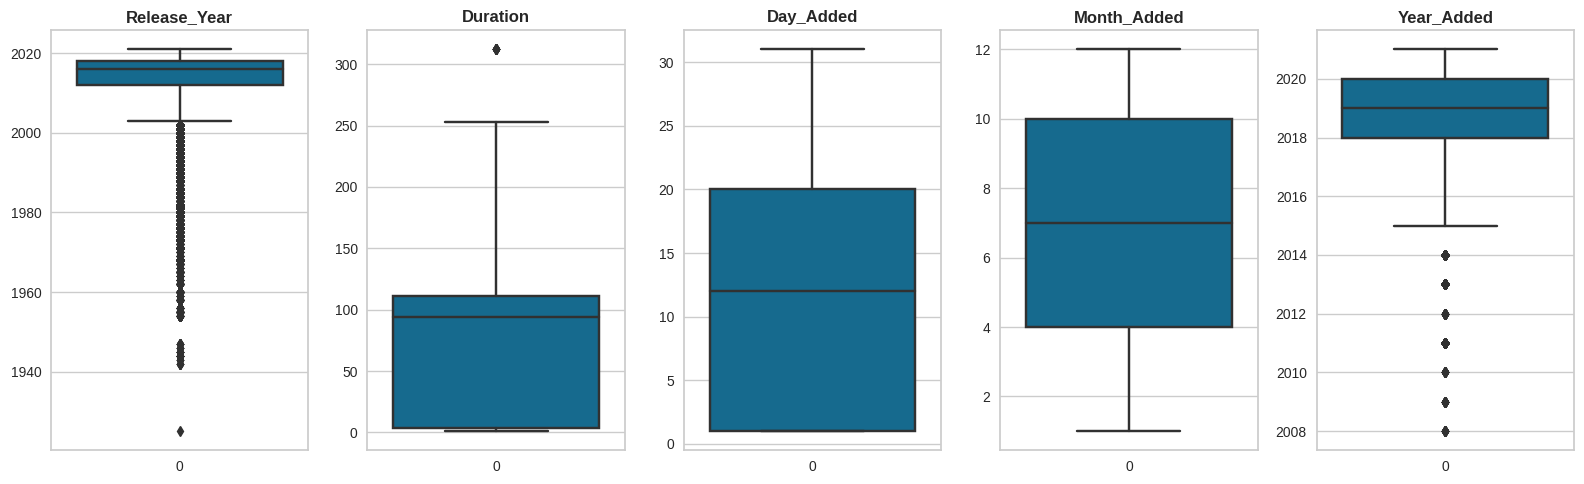

In [ ]:
# Handling Outliers & Outlier treatments
value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(netflix_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the chart, we clearly see minimum amount of outlier values in continuous features and those values doesn't have much impact. So we are not paying much attention on that.

### 3. Categorical Encoding

In [ ]:
new_netflix_df.shape,netflix_df.shape

((7770, 12), (175807, 13))

In [ ]:
# Encode your categorical columns

new_netflix_df['rating'].replace(rating_map, inplace = True)

new_netflix_df.sample(2)

show_id   type                                            title  \
7196   s7197  Movie                                            Trash   
2036   s2037  Movie  Eurovision Song Contest: The Story of Fire Saga   

            director                                               cast  \
7196  Stephen Daldry  Wagner Moura, Martin Sheen, Rooney Mara, Selto...   
2036    David Dobkin  Will Ferrell, Rachel McAdams, Dan Stevens, Mel...   

                              country       date_added  release_year  \
7196  United Kingdom, Brazil, Germany  January 1, 2019          2014   
2036                    United States    June 26, 2020          2020   

             rating duration                                    listed_in  \
7196  Adult Content  114 min        Dramas, Independent Movies, Thrillers   
2036   Teen Content  124 min  Comedies, Music & Musicals, Romantic Movies   

                                            description  
7196  Three poor Brazilian teens find something susp...  
2036  Two small-town singers chase their pop star dr...

We are just replacing the values in rating with the values of rating map.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Handling Textual Columns

In [ ]:
# Combination of columns
new_netflix_df["content_detail"]= new_netflix_df["cast"]+" "+new_netflix_df["director"]+" "+new_netflix_df["listed_in"]+" "+new_netflix_df["type"]+" "+new_netflix_df["rating"]+" "+new_netflix_df["country"]+" "+new_netflix_df["description"]

#checking the manipulation
new_netflix_df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...  
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [ ]:
# Lower Casing
new_netflix_df['content_detail']= new_netflix_df['content_detail'].str.lower()

# Checking the manipulation
new_netflix_df.iloc[255]['content_detail']


"scott kelly unknown docuseries, international tv shows, science & nature tv tv show children content united states two astronauts attempt to brave a life in earth's orbit on a record-setting mission to see if humans have the endurance to survive a flight to mars."

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

def remove_punctuations(text):
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
new_netflix_df.iloc[255]['content_detail']

'scott kelly unknown docuseries international tv shows science  nature tv tv show children content united states two astronauts attempt to brave a life in earths orbit on a recordsetting mission to see if humans have the endurance to survive a flight to mars'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text # return the text stripped off URL's and Numbers

In [ ]:
# Remove URLs & Remove words and digits contain digits
new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
new_netflix_df.iloc[255]['content_detail']

'scott kelly unknown docuseries international tv shows science  nature tv tv show children content united states two astronauts attempt to brave a life in earths orbit on a recordsetting mission to see if humans have the endurance to survive a flight to mars'

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove White spaces
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text


# Remove URLs & Remove words and digits contain digits
new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
new_netflix_df.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### 6. Rephrase Text

Paraphrase generation is the task of generating an output sentence that preserves the meaning of the input sentence with variations in word choice and grammar. Here Rephrasing is not necessary in this process.

#### 7. Tokenization

In [ ]:
# Tokenization
new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
new_netflix_df.iloc[255]['content_detail']

['scott',
 'kelly',
 'unknown',
 'docuseries',
 'international',
 'tv',
 'shows',
 'science',
 'nature',
 'tv',
 'tv',
 'show',
 'children',
 'content',
 'united',
 'states',
 'two',
 'astronauts',
 'attempt',
 'brave',
 'life',
 'earths',
 'orbit',
 'recordsetting',
 'mission',
 'see',
 'humans',
 'endurance',
 'survive',
 'flight',
 'mars']

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

In [ ]:
# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Rephrasing text by applying defined lemmatizing function
new_netflix_df['content_detail']= new_netflix_df['content_detail'].apply(lemmatizer)

# Checking the observation after manipulation
new_netflix_df.iloc[255]['content_detail']

'scott kelly unknown docuseries international tv show science nature tv tv show child content united state two astronaut attempt brave life earth orbit recordsetting mission see human endurance survive flight mar'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

* Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

* Lemmatization can handle different inflections and it produces real words it will be helpful in text understanding.

* Lemmatization supports multiple languages: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# tokenize the text into words before POS Taging
new_netflix_df['pos_tags'] = new_netflix_df['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
new_netflix_df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### 10. Text Vectorization

In [ ]:
# Importing needed text vector libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorizing Text
tfidfv = TfidfVectorizer(max_features=30000)

# Fitting the value in TfidfVectorizer
x= tfidfv.fit_transform(new_netflix_df['content_detail'])

# Re-Checking shape of the reformed document matrix
print(x.shape)

(7770, 30000)


### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines.  So, dimensionality reduction is needed to reduce the complexity.

* In this study, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
# Dimensionality Reduction (If needed)
# Importing PCA from sklearn
from sklearn.decomposition import PCA

In [ ]:
# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44285929e-02 4.03650307e-03 3.30085224e-03 ... 1.19007193e-35
 5.87480154e-36 6.87367427e-37]


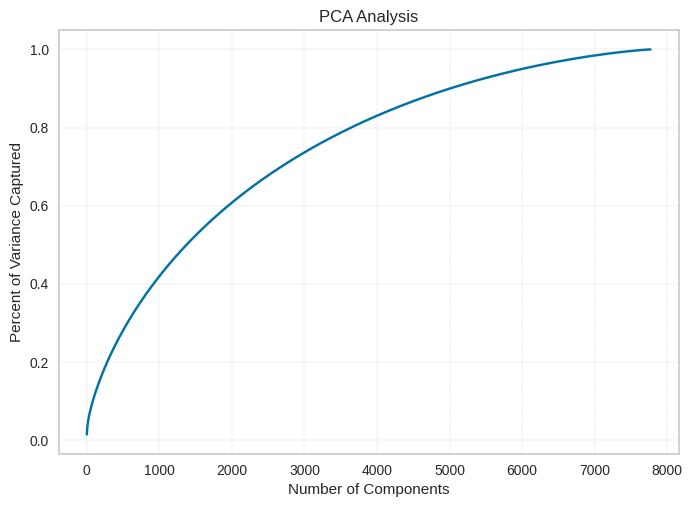

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 5997)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - 1

###**K-means clustering**

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

 The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just iterate over a loop of clusters ranging from 1 to 16 and try to find the optimal number of clusters with ELBOW method.

In [ ]:
# ML Model - 1 Implementation

# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

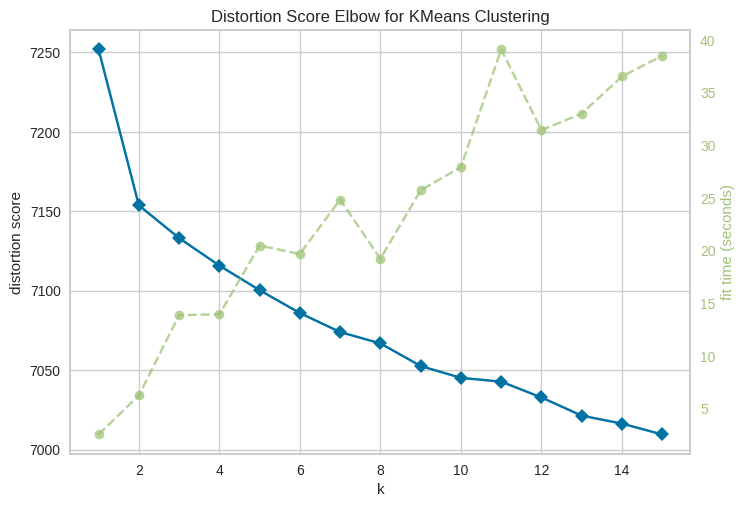

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Determining optimal value of K using KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

From the charts, it seems that the elbow is forming at the two clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

**Silhouette Score** is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

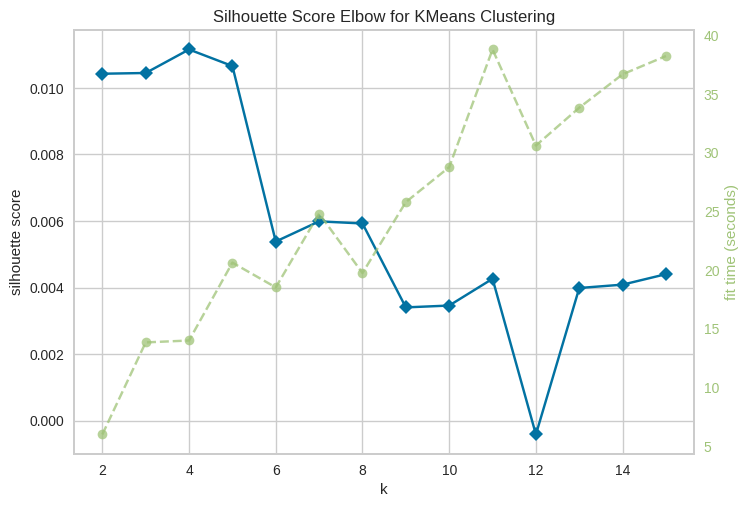

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

In [ ]:
# Visualizing evaluation Metric Score chart
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010375
k=3, Silhouette score=0.009967
k=4, Silhouette score=0.010603
k=5, Silhouette score=0.010932
k=6, Silhouette score=0.010943


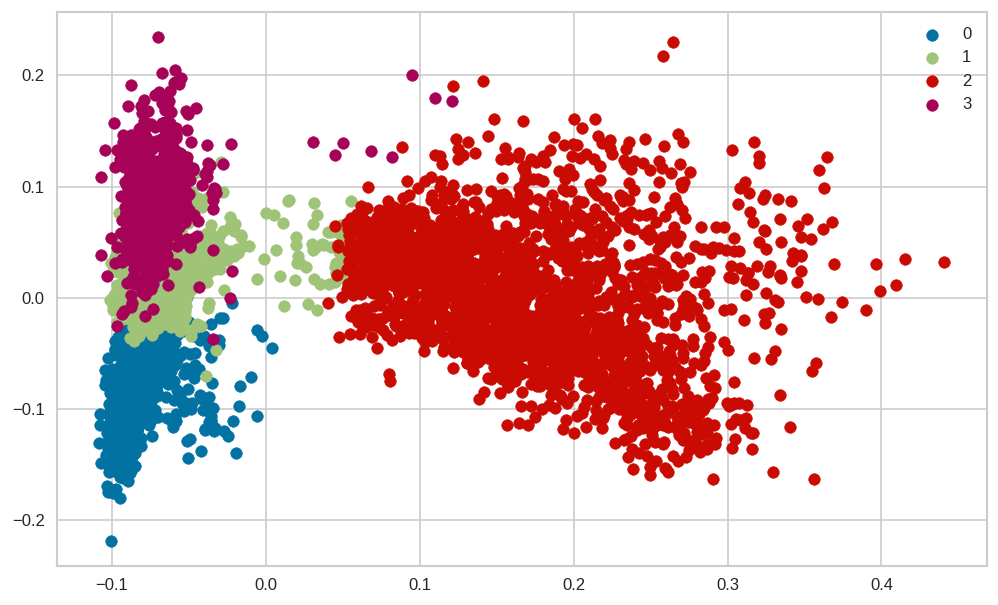

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

From the result graph, We have seen 4 different clusters at the end of the process and this will be more cleary exposed  in 3D space.

In [ ]:
# Add cluster values to the dateframe.
new_netflix_df['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = new_netflix_df[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

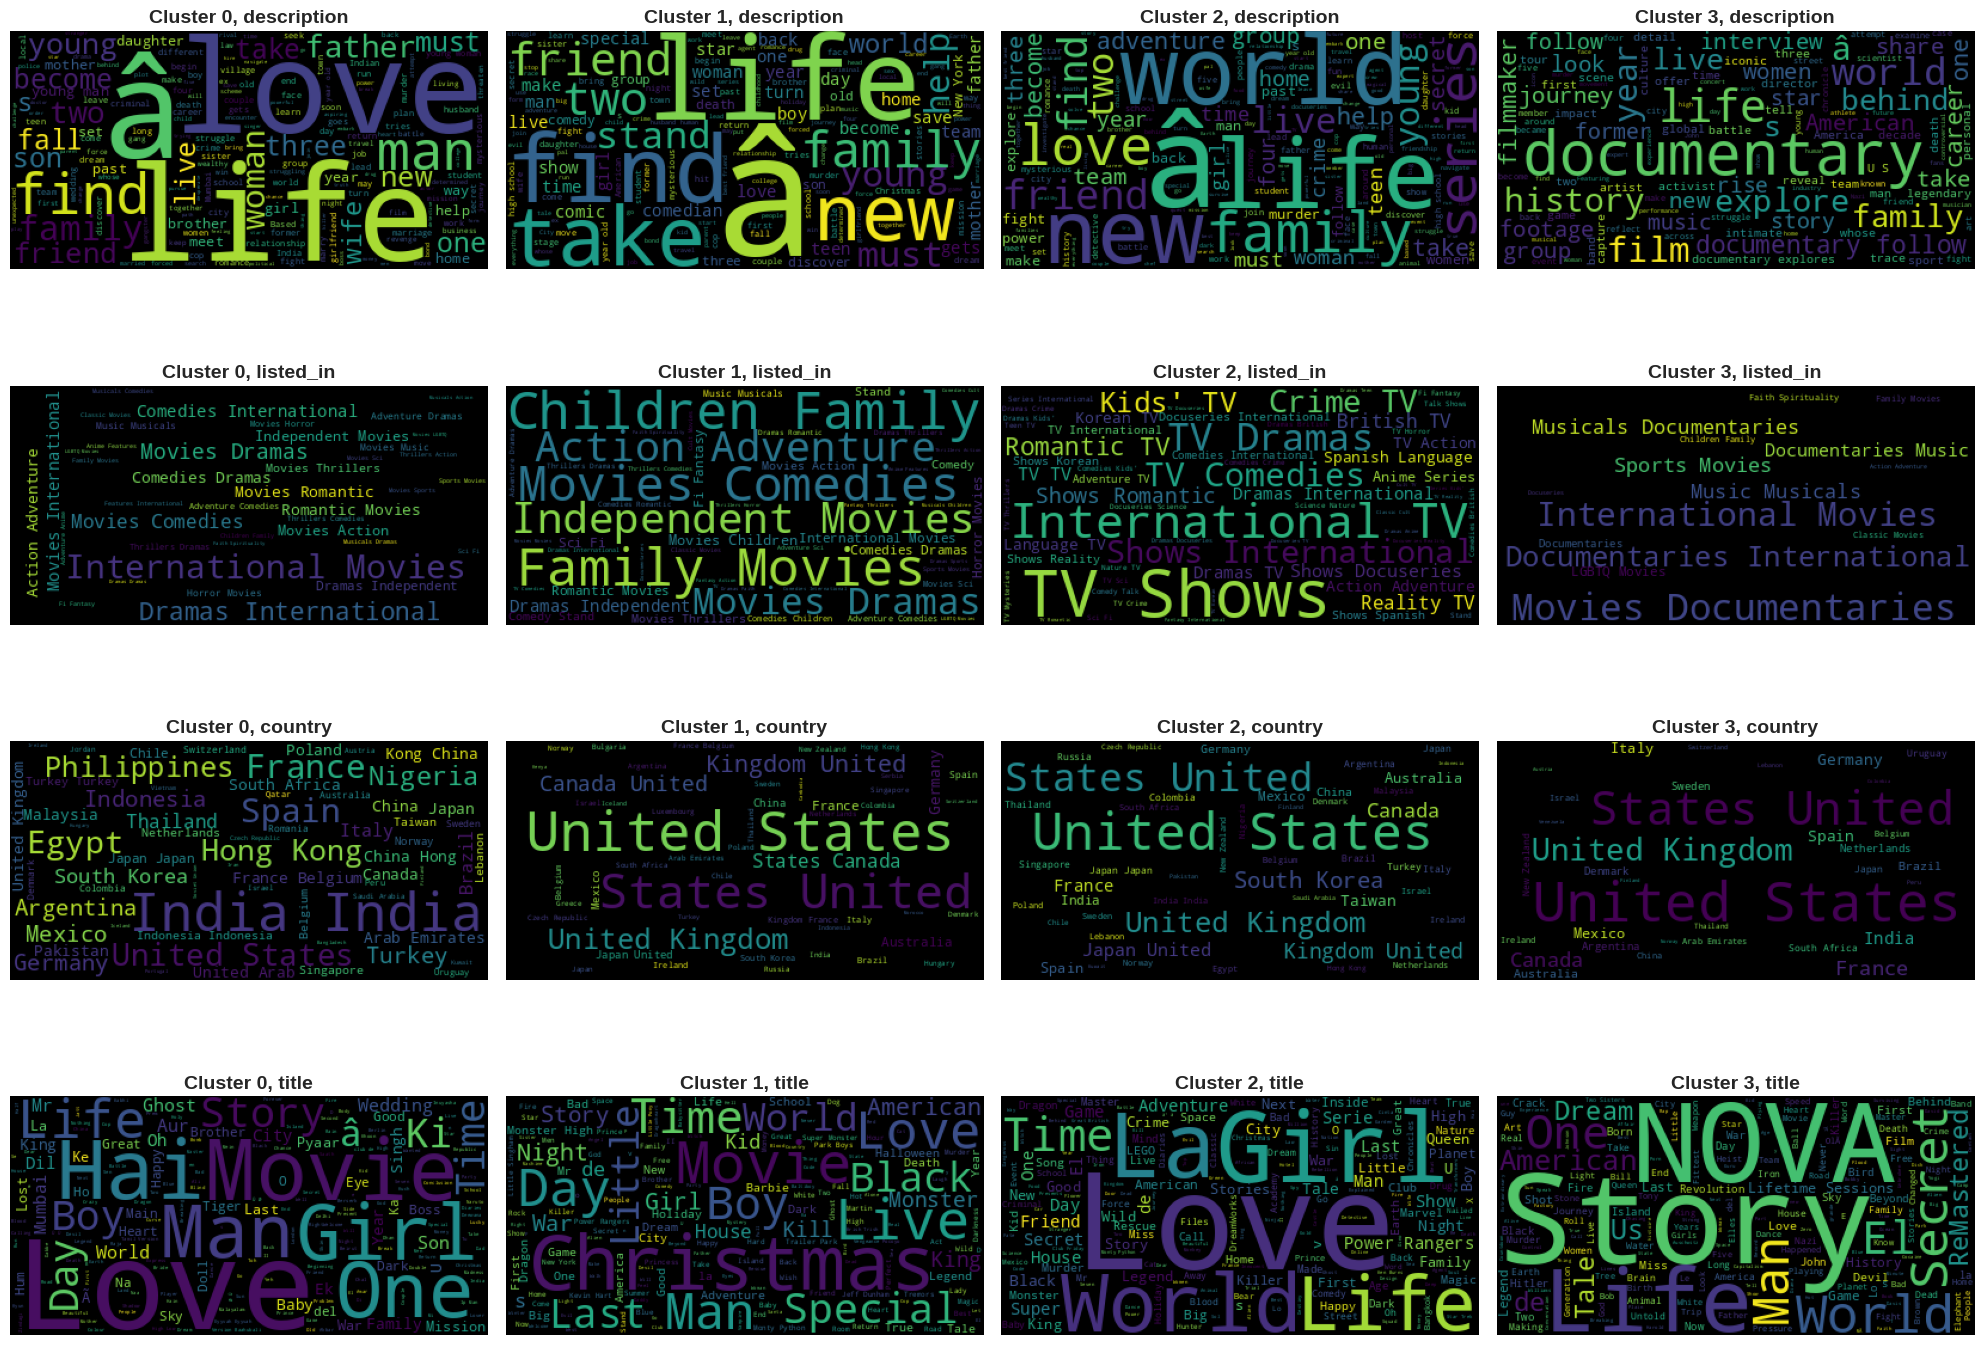

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2

###**Hierarchical clustering**

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* From the result dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

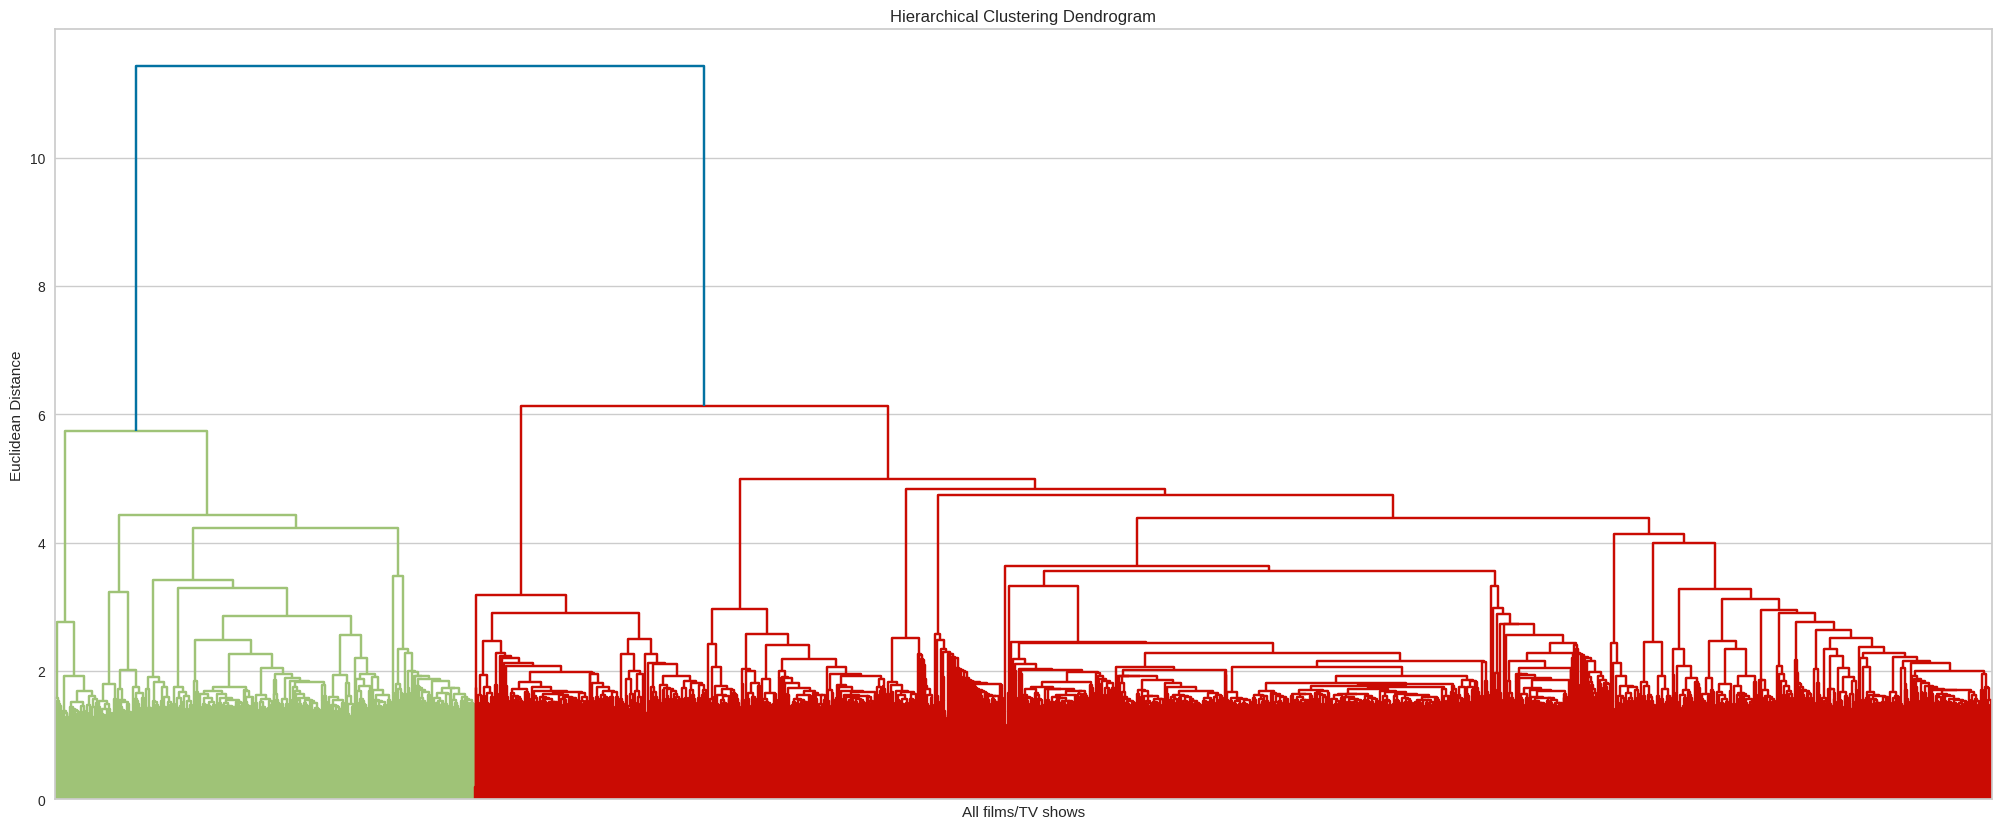

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))


k=2, Silhouette score=0.005102
k=3, Silhouette score=0.004963
k=4, Silhouette score=0.000350
k=5, Silhouette score=0.000442
k=6, Silhouette score=0.001113
k=7, Silhouette score=0.001415
k=8, Silhouette score=0.000528
k=9, Silhouette score=0.000950


From the above silhouette scores it is clear that the 2  clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.


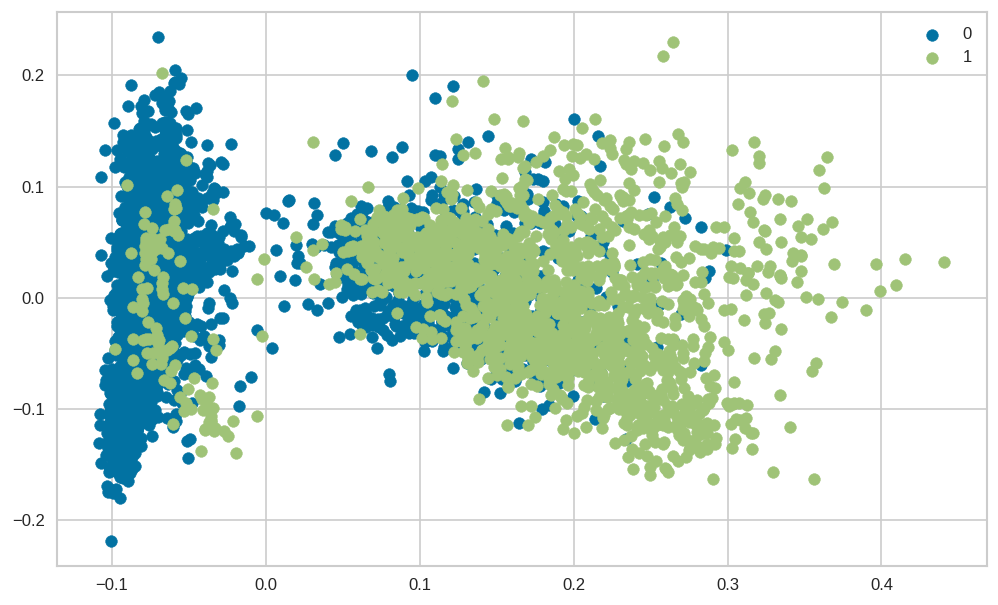

In [ ]:
#Again plot the chart and observe the 2 different formed clusters.

#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

This above plot will give some indication of two cluster but for better visualization we can try this in 3 D plot too

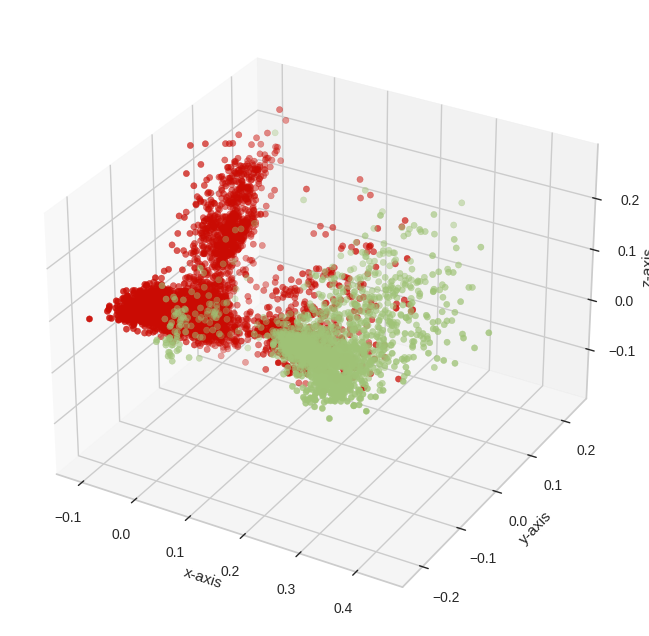

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

From the result chart, we can easily differentiate all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We are using Agglomerative Clustering technique to define a function that plots wordcloud for different attributes.

In [ ]:
# Add cluster values to the dateframe.
new_netflix_df['agglomerative_cluster'] = Agmodel.labels_

In [ ]:
# Visualizing evaluation Metric Score chart
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = new_netflix_df[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

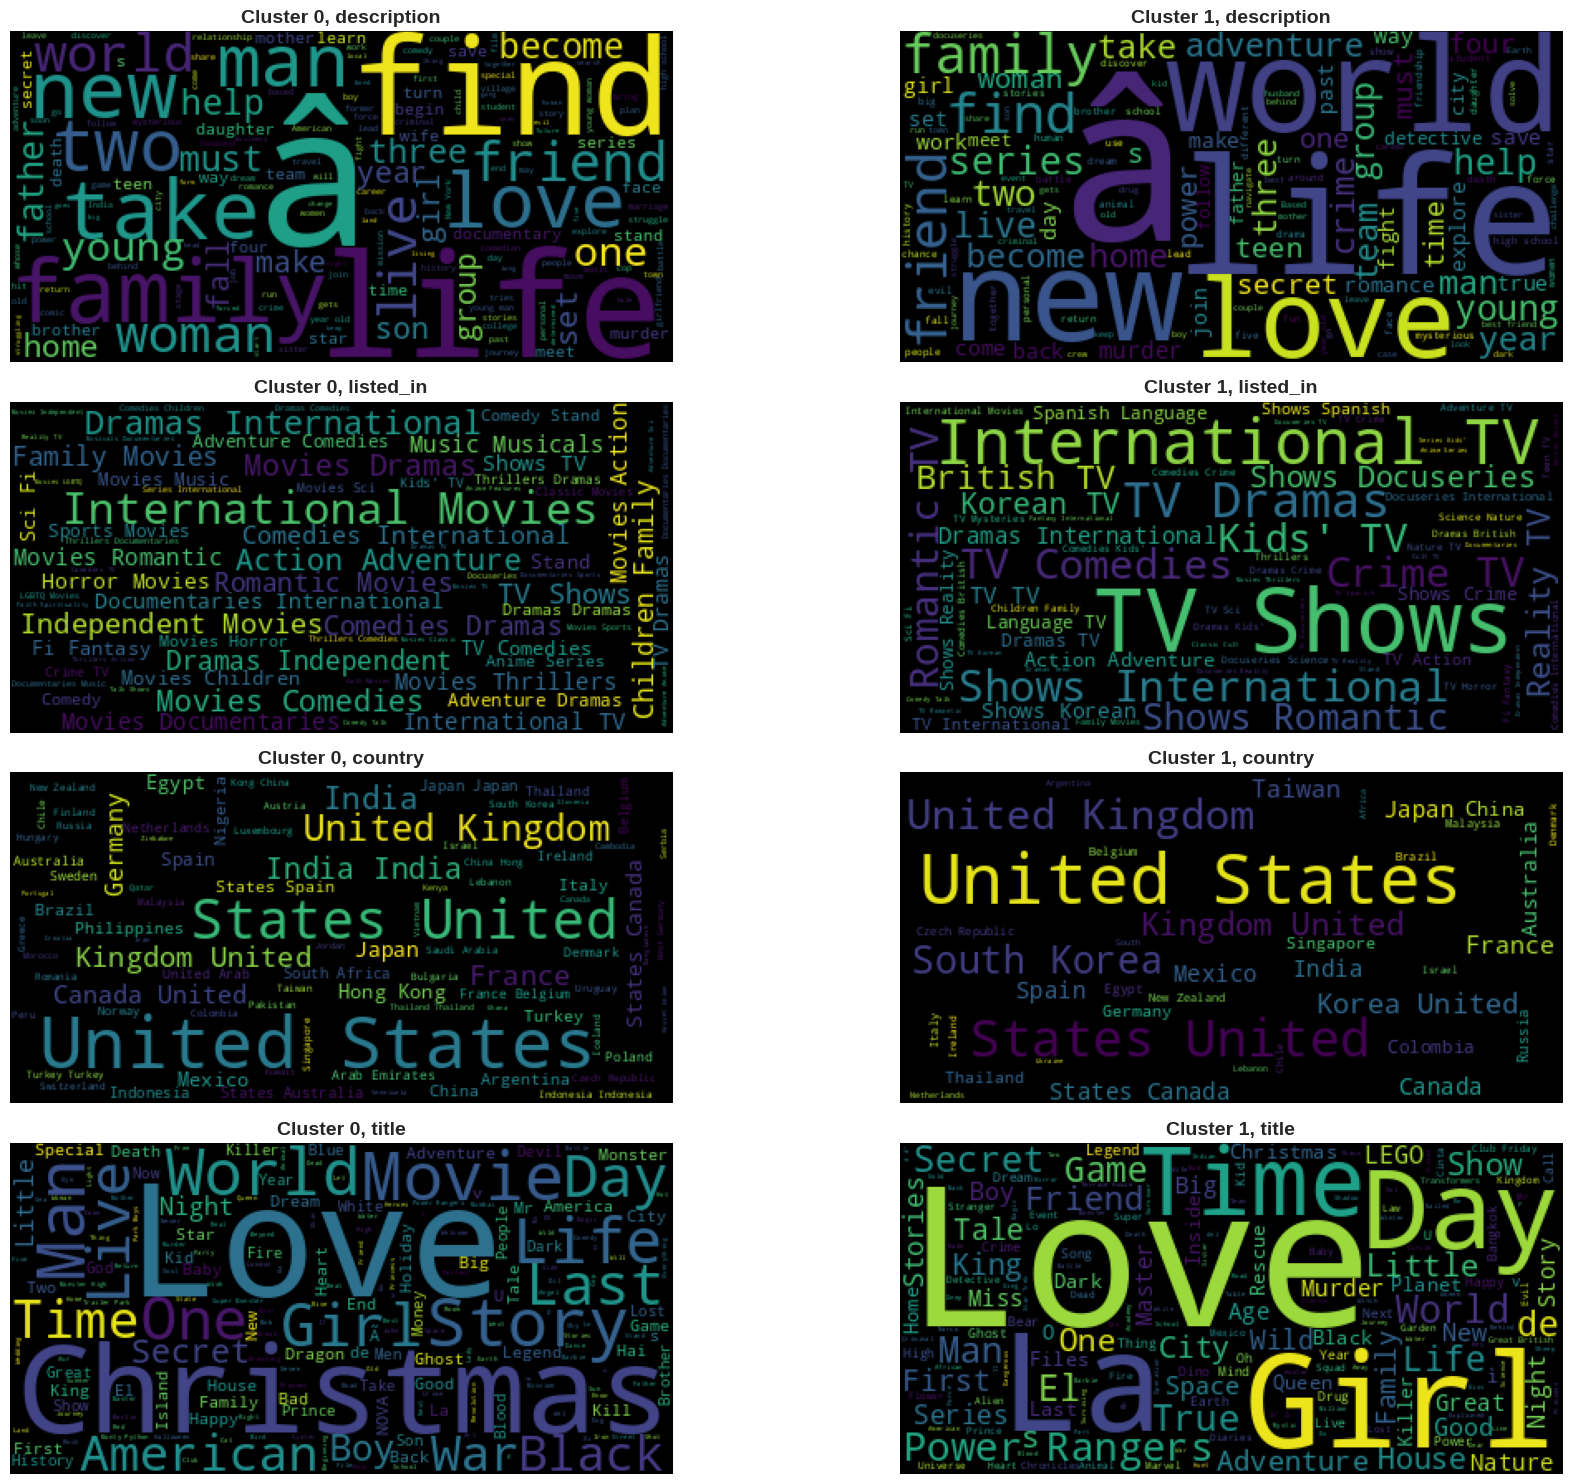

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3

###**Building a Recommendaton System**

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We are using cosine similarity over tf-idf because:

Cosine similarity handles high dimensional sparse data better.

Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# ML Model - 3 Implementation
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_netflix_df['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=new_netflix_df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2567
1                                          Kya Kehna                 0.2300
2  My Next Guest with David Letterman and Shah Ru...                 0.2048
3                                 Kuch Kuch Hota Hai                 0.1842
4                              Together For Eternity                 0.1840
5                               Kabhi Haan Kabhi Naa                 0.1814
6                                    Chashme Baddoor                 0.1776
7                           Kabhi Khushi Kabhie Gham                 0.1725
8                             Kabhi Alvida Naa Kehna                 0.1713
9                                      Chalte Chalte                 0.1699

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0     30 Minutes or Less                 0.1600
1                Kingpin                 0.1121
2        No Reservations                 0.1113
3          THE RUM DIARY                 0.1020
4            Night Moves                 0.1013
5    The End of the Tour                 0.0925
6                   Hush                 0.0923
7  The Edge of Seventeen                 0.0877
8             Santa Girl                 0.0874
9        Kiss the Ground                 0.0874

In [ ]:
# Testing non indian tv show
recommend_content('Vampires')

Recommendation  Similarity_score(0-1)
0         The World Is Yours                 0.1429
1                   Dinotrux                 0.1217
2          Inhuman Resources                 0.1194
3                   Real Rob                 0.1182
4                    Dracula                 0.1164
5                      Balto                 0.1149
6                    Divines                 0.1100
7  My Babysitter's a Vampire                 0.1042
8       The Umbrella Academy                 0.1037
9              The Originals                 0.1019

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In this study, we have chosen **Silhoutte Score** over **Distortion Score** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters.

Generally it ranges from -1 to 1, with higher values indicating better cluster separation. If silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From all the three models we have tried, In **K-means**  we are getting the comparatevely **high Silhoutte Score** and the resulted clusters are very well seperated from each others as represented in a 3 dimensional plane.

Apart from this, in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

# **Conclusion**

📍 In this study we have analyzed the data by using EDA techniques and also by ML models. Initially on exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset.

 we have drawn some conclusions like

* In Netflix content ratio Movies make up about **two-thirds** and TV shows comprising the remaining **one-third**.

* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies and Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.


* The United States is the largest producer of movies and TV shows on Netflix, followed by India. Japan and South Korea have more TV shows than movies, indicating growth potential in that area. In similar to that International movies, drama, and comedy are the most popular genres on Netflix and also various countries contribute adult and teen content, with Spain producing the most adult content and Canada focusing on children and family-friendly categories.

As a conclusion, we cleary see that in recent times adult content is more popular. So based on the insights, if companies try to develop more watch time then they have to focus more on these popular features.

📍 From the conclusion of ML models, we got some informations that will be impactful in a positive way.

* From the implementation of K-Means Clustering and Agglomerative Hierarchical Clustering, we got the optimal number of clusters as 4 in K-means , whereas for Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2. We chose Silhouette Score as the evaluation metric over distortion score because it provides a more intuitive and interpretable result.

* By the result of these clustering techniques, we found more reliable group of features (clusters) to be considered in the development of business and also these points are helpful in reducing subscriber churn.


* In next model, we built a Recommendation system that can help Netflix improve user experience and reduce subscriber churn by providing personalized recommendations to users based on their similarity scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***